# Homework 6
You need to classify digits with SVM models in this homework. Use PCA to reduce data dimensionality (80% information remain). Compare performance of linear, radial, and polynomial kernals. Tune kernal parameters using Randomsearch method.

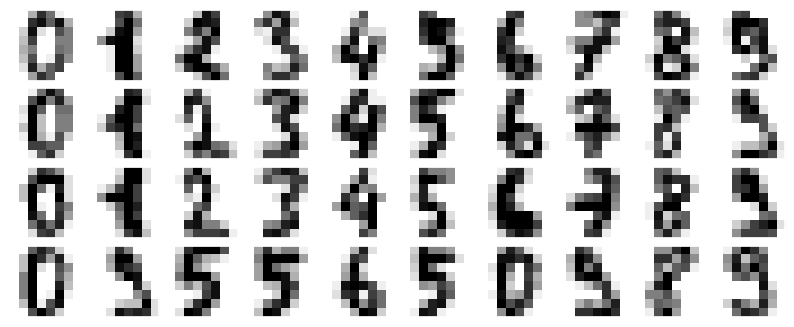

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

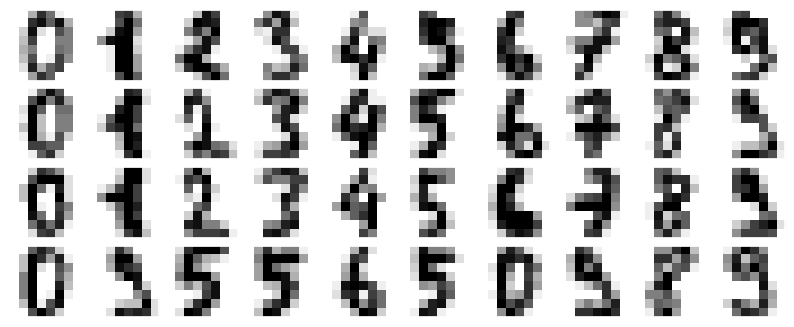

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = datasets.load_digits()

# Visualize first 40 digits
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

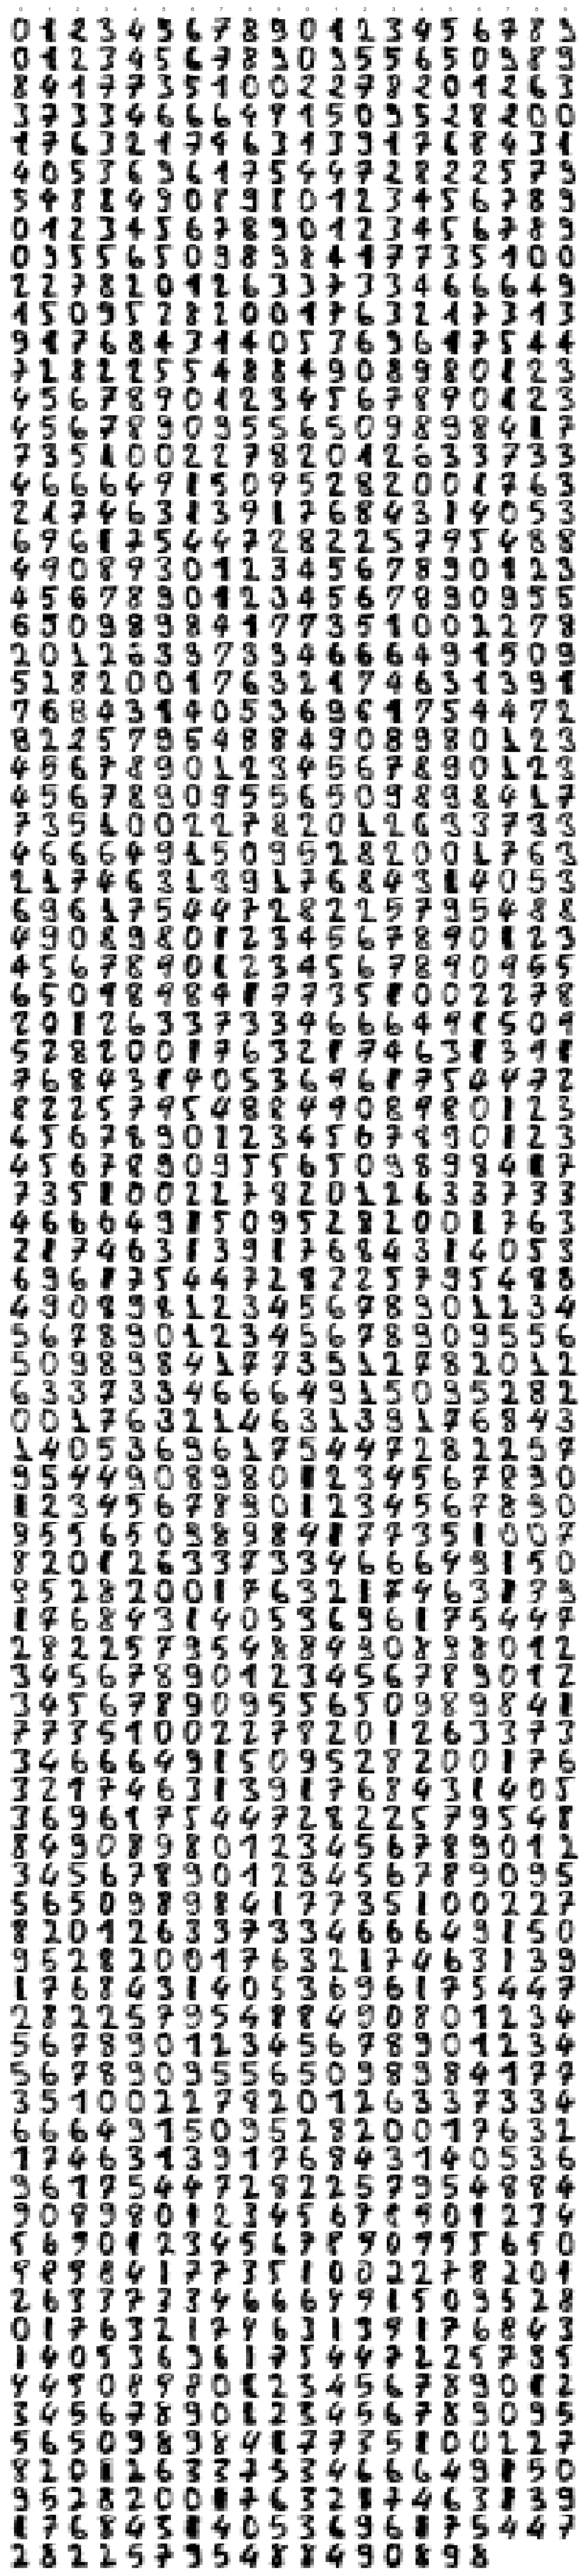

In [ ]:
# Defines a function to plot all digits in dataset
def plot_all_digits(data, labels, images_per_row=20):
    n_samples = len(data)  # Sample entire Dataset
    n_rows = (n_samples // images_per_row) + 1  # Calculate the # of Rows
    
    fig, axes = plt.subplots(n_rows, images_per_row, figsize=(images_per_row * 0.5, n_rows * 0.5),
                             subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    # Flatten axes for easy iteration
    axes = axes.flat if n_rows > 1 else [axes]
    
    for i, ax in enumerate(axes[:n_samples]):  # Plot entire Dataset
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
        ax.set_title(labels[i], fontsize=6)  # Display the Labels (what digit)
    
    # Turn off unused axes
    for ax in axes[n_samples:]:
        ax.axis('off')
    
    plt.show()

# Calls the function
plot_all_digits(digits.data, digits.target, images_per_row=20)


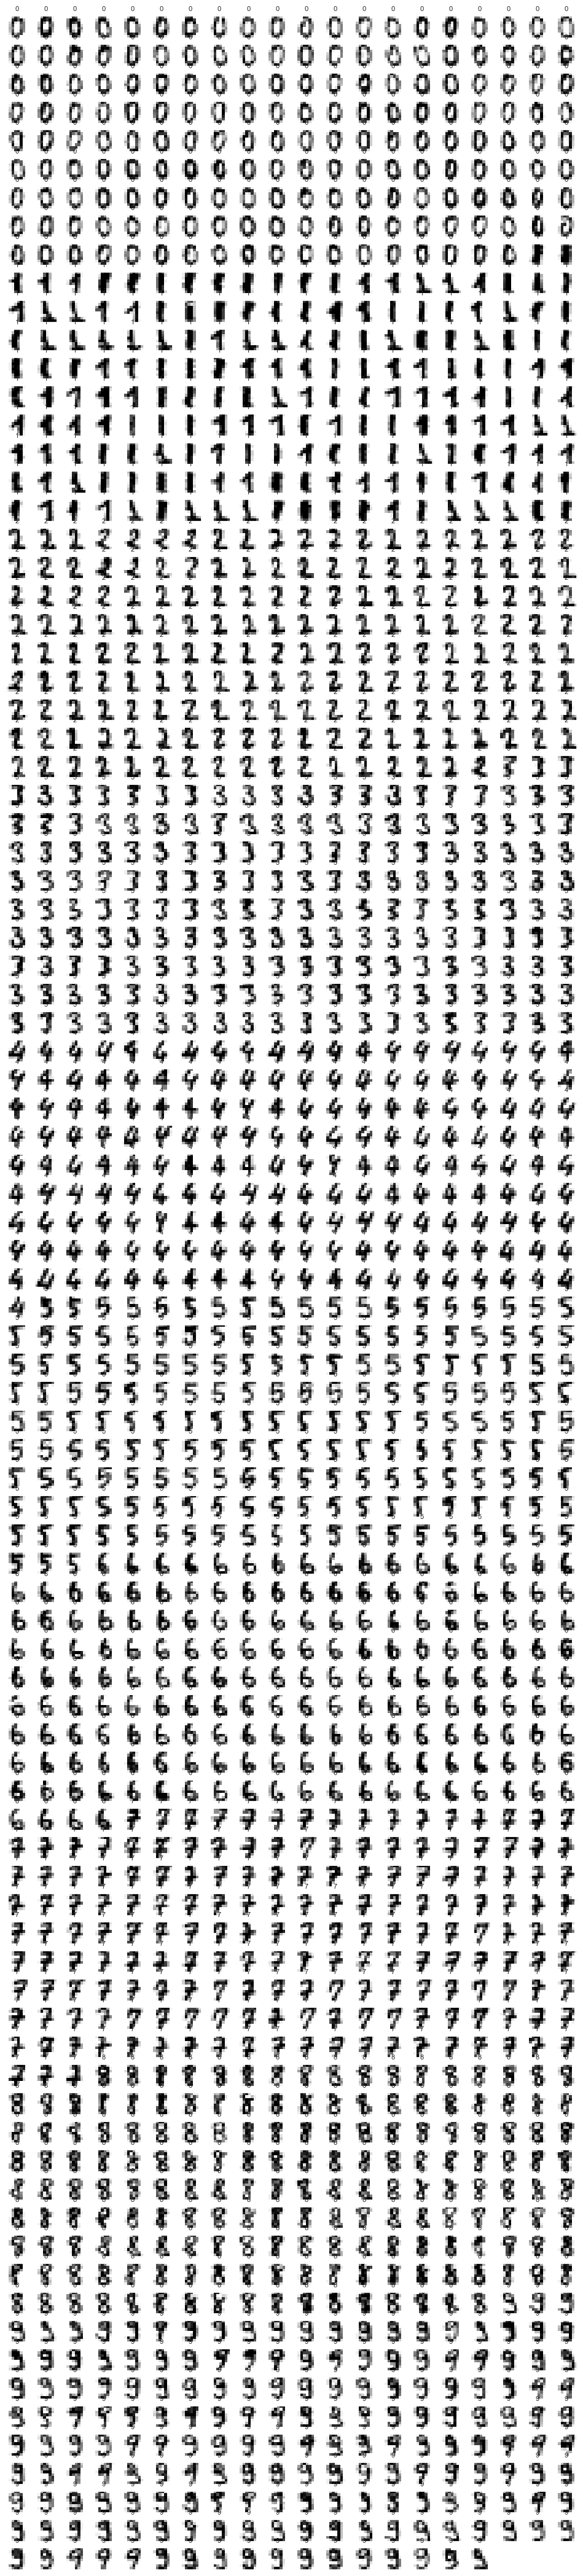

In [ ]:
# Defines a function to plot all digits in dataset sorted by their labels
def plot_all_digits_sorted(data, labels, images_per_row=20):
    # Sort data and labels by their class (what digit)
    sorted_indices = np.argsort(labels)
    sorted_data = data[sorted_indices]
    sorted_labels = labels[sorted_indices]
    
    # Calculate number of rows needed
    n_samples = len(sorted_data)
    n_rows = (n_samples // images_per_row) + 1

    # Create a grid for visualization
    fig, axes = plt.subplots(n_rows, images_per_row, figsize=(images_per_row * 0.6, n_rows * 0.6),
                             subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.3, wspace=0.3))
    
    # Flatten axes for easy iteration
    axes = axes.flat if n_rows > 1 else [axes]
    
    for i, ax in enumerate(axes[:n_samples]):  # Plot only up to the number of samples
        ax.imshow(sorted_data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
        ax.set_title(sorted_labels[i], fontsize=8)  # Display the sorted label (digit)
    
    # Turn off unused axes
    for ax in axes[n_samples:]:
        ax.axis('off')
    
    plt.show()

# Calls the function
plot_all_digits_sorted(digits.data, digits.target, images_per_row=20)


In [ ]:
# Splits the dataset into data (X) and target (y)
X, y = digits.data, digits.target

# PCA reduces dimensionality to leave 80 percent
pca = PCA(n_components=0.80, random_state=42)
X_reduced = pca.fit_transform(X)

# Function to tune SVM and evaluate performance
def tune_and_evaluate_svm(kernel, param_distributions):
    # Pipeline with StandardScaler and SVM
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', svm.SVC(kernel=kernel))
    ])
    
    # RandomizedSearchCV for hyperparameter tuning
    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_distributions,
        n_iter=300,  # Number of random samples
        cv=5,  # 5-fold Cross-Validation
        scoring='accuracy',
        random_state=42,
        n_jobs=-1
    )
    search.fit(X_reduced, y)
    
    # Get best parameters and cross-validated score
    best_params = search.best_params_
    best_score = cross_val_score(search.best_estimator_, X_reduced, y, cv=5).mean()
    return best_params, best_score

# Define parameter grids for each kernel
linear_params = {'svm__C': np.logspace(-3, 3, 10)}
rbf_params = {'svm__C': np.logspace(-3, 3, 10), 'svm__gamma': np.logspace(-3, 3, 10)}
poly_params = {'svm__C': np.logspace(-3, 3, 10), 'svm__degree': [2, 3, 4, 5], 'svm__gamma': np.logspace(-3, 3, 10)}

# Tune and evaluate models
linear_best_params, linear_best_score = tune_and_evaluate_svm('linear', linear_params)
rbf_best_params, rbf_best_score = tune_and_evaluate_svm('rbf', rbf_params)
poly_best_params, poly_best_score = tune_and_evaluate_svm('poly', poly_params)

c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 10 is smaller than n_iter=300. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 100 is smaller than n_iter=300. Running 100 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [25]:
# Print results
print("Linear Kernel: Best Params:", linear_best_params, "Score:", linear_best_score)
print("RBF Kernel: Best Params:", rbf_best_params, "Score:", rbf_best_score)
print("Polynomial Kernel: Best Params:", poly_best_params, "Score:", poly_best_score)

# Compare Results
results = {
    'Linear': linear_best_score,
    'RBF': rbf_best_score,
    'Polynomial': poly_best_score
}

Linear Kernel: Best Params: {'svm__C': np.float64(0.46415888336127775)} Score: 0.9315784586815228
RBF Kernel: Best Params: {'svm__gamma': np.float64(0.1), 'svm__C': np.float64(2.154434690031882)} Score: 0.9599427421850819
Polynomial Kernel: Best Params: {'svm__gamma': np.float64(0.46415888336127775), 'svm__degree': 3, 'svm__C': np.float64(0.021544346900318832)} Score: 0.9588347260909934


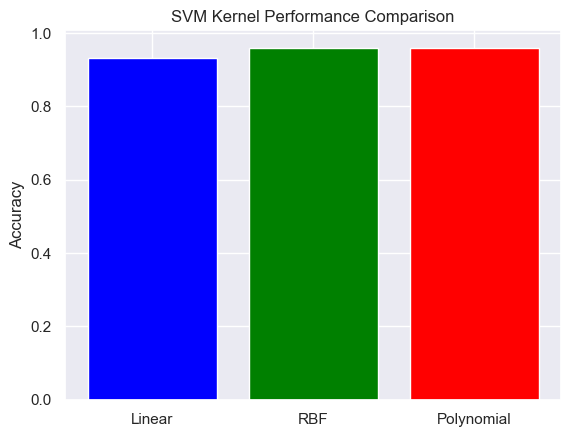

In [26]:
# Plot results
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('SVM Kernel Performance Comparison')
plt.show()

The best-performing kernel is: rbf


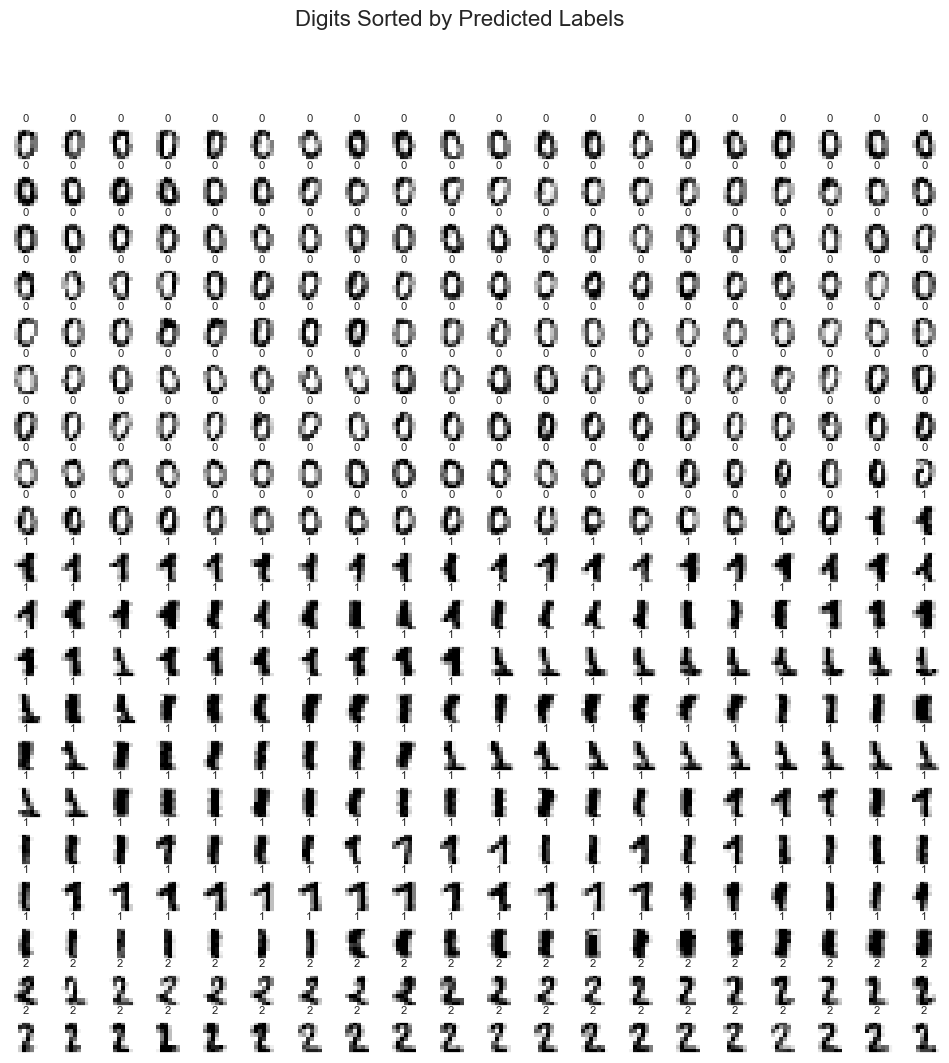

In [ ]:
# Identify the best kernel based on performance
kernel_scores = {
    'linear': linear_best_score,
    'rbf': rbf_best_score,
    'polynomial': poly_best_score
}
best_kernel = max(kernel_scores, key=kernel_scores.get)
print(f"The best-performing kernel is: {best_kernel}")

# Retrains the SVM model with the best kernel on the entire dataset
if best_kernel == 'linear':
    best_params = linear_best_params
    kernel = 'linear'
elif best_kernel == 'rbf':
    best_params = rbf_best_params
    kernel = 'rbf'
else:  # Polynomial
    best_params = poly_best_params
    kernel = 'poly'

# Create the pipeline and train the model
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.80, random_state=42)),
    ('svm', svm.SVC(kernel=kernel, **{k.split('__')[1]: v for k, v in best_params.items()}))
])
best_pipeline.fit(X, y)

# Predict the digit classes
predicted = best_pipeline.predict(X)

# Combine data with predictions for sorting
sorted_data = sorted(zip(predicted, X, digits.images), key=lambda x: x[0])

# Extract sorted images
sorted_images = [item[2] for item in sorted_data]

# Visualize sorted digits
def plot_sorted_digits(images, labels):
    fig, axes = plt.subplots(20, 20, figsize=(12, 12),
                             subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.5, wspace=0.5))
    for i, ax in enumerate(axes.flat[:400]):
        ax.imshow(images[i], cmap='binary', interpolation='nearest')
        ax.set_title(labels[i], fontsize=8)

# Extract sorted labels for visualization
sorted_labels = [item[0] for item in sorted_data]

# Shows first 400 sorted digits
plot_sorted_digits(sorted_images, sorted_labels)
plt.suptitle("Digits Sorted by Predicted Labels", fontsize=16)
plt.show()

I added extra displays of data so we could better understand our results.